# Experiments

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt
import json
from tqdm import tqdm
import random
from tifffile import imread

In [2]:
DIR = "./input"
train_df = pd.read_csv(os.path.join(DIR,"train.csv"))
train_df.head()

id     organ data_source  img_height  img_width  pixel_size  \
0  10044  prostate         HPA        3000       3000         0.4   
1  10274  prostate         HPA        3000       3000         0.4   
2  10392    spleen         HPA        3000       3000         0.4   
3  10488      lung         HPA        3000       3000         0.4   
4  10610    spleen         HPA        3000       3000         0.4   

   tissue_thickness                                                rle   age  \
0                 4  1459676 77 1462675 82 1465674 87 1468673 92 14...  37.0   
1                 4  715707 2 718705 8 721703 11 724701 18 727692 3...  76.0   
2                 4  1228631 20 1231629 24 1234624 40 1237623 47 12...  82.0   
3                 4  3446519 15 3449517 17 3452514 20 3455510 24 34...  78.0   
4                 4  478925 68 481909 87 484893 105 487863 154 4908...  21.0   

      sex  
0    Male  
1    Male  
2    Male  
3    Male  
4  Female

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                351 non-null    int64  
 1   organ             351 non-null    object 
 2   data_source       351 non-null    object 
 3   img_height        351 non-null    int64  
 4   img_width         351 non-null    int64  
 5   pixel_size        351 non-null    float64
 6   tissue_thickness  351 non-null    int64  
 7   rle               351 non-null    object 
 8   age               351 non-null    float64
 9   sex               351 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 27.5+ KB


<AxesSubplot:>

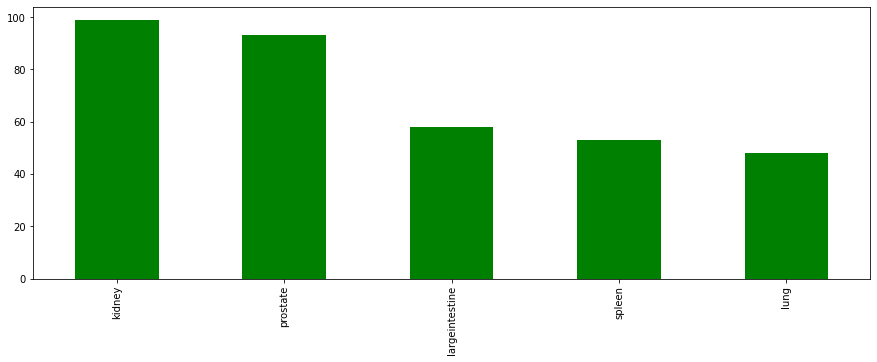

In [4]:
plt.figure(figsize=(15,5))
train_df["organ"].value_counts().plot(kind='bar', color='green')

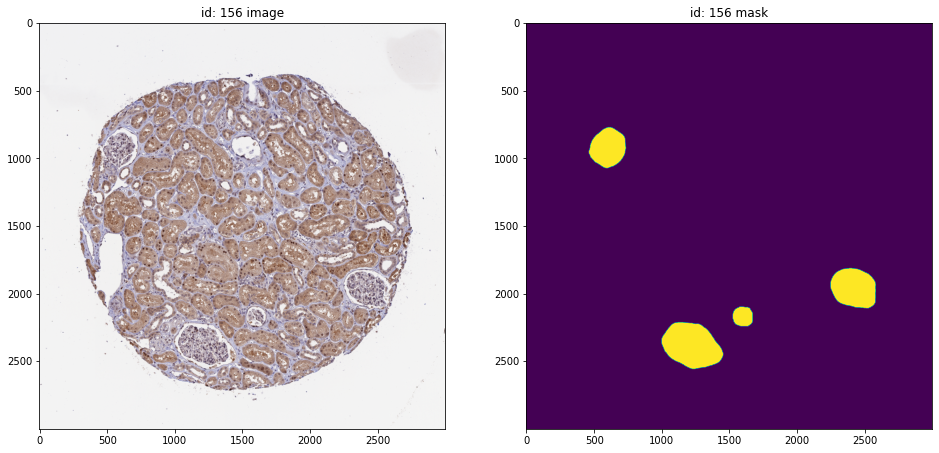

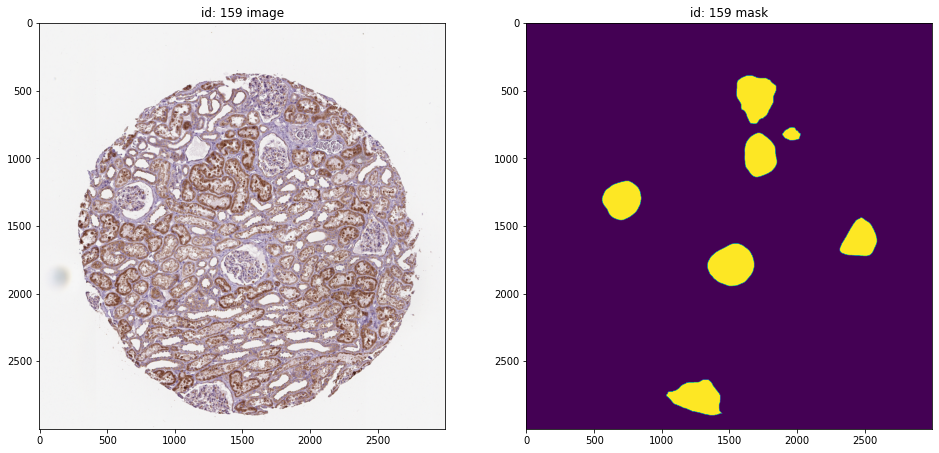

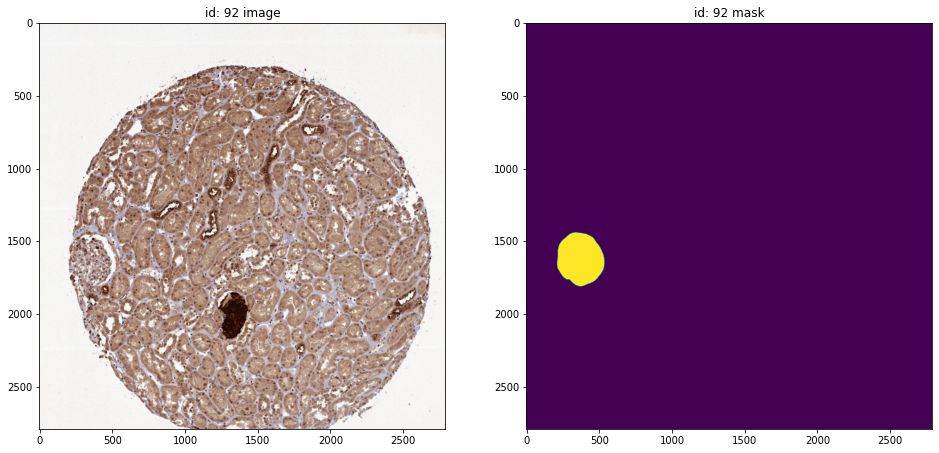

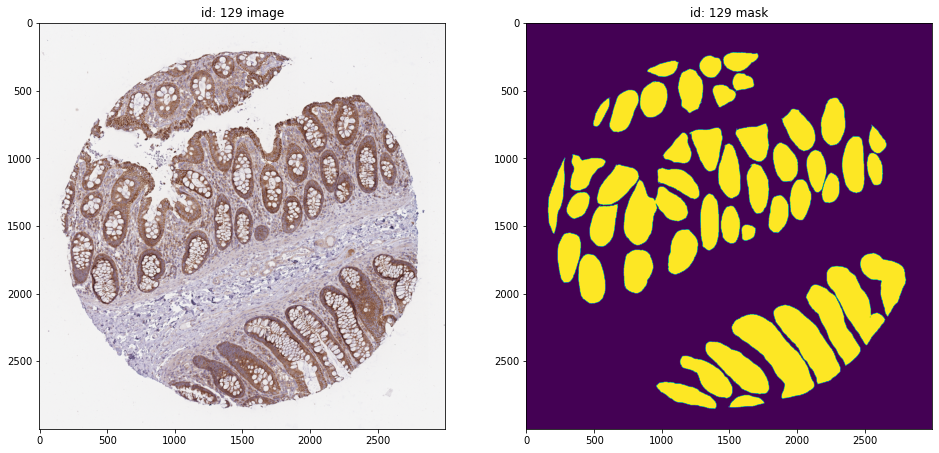

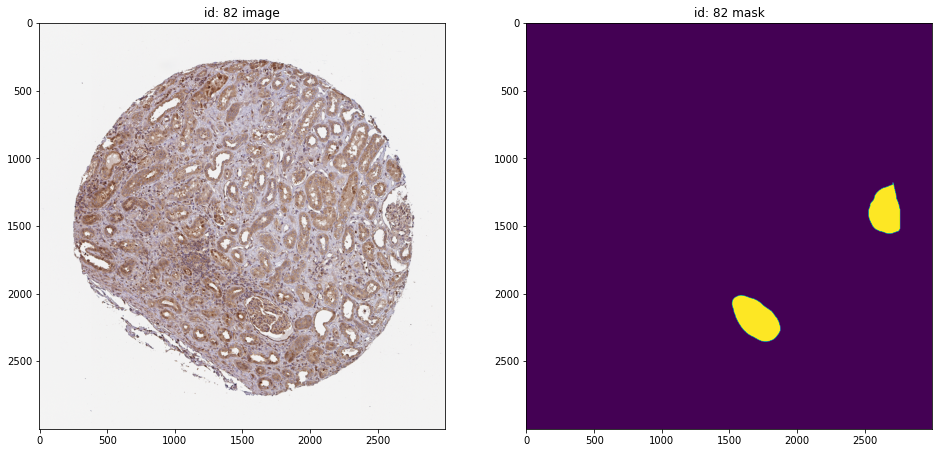

In [5]:
import numpy as np
from src.utils.rle import rle2mask

for i in np.random.choice(200,5):
    rle_img = rle2mask(train_df["rle"].iloc[i],(train_df["img_height"].iloc[i],train_df["img_width"].iloc[i]))
    img_dir = os.path.join(DIR, "train_images" , str(train_df["id"].iloc[i]) + '.tiff')
    img = plt.imread(img_dir)

    plt.figure(figsize=(16,18))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title(f"id: {i} image")

    plt.subplot(1,2,2)
    plt.imshow(rle_img)
    plt.title(f"id: {i} mask");

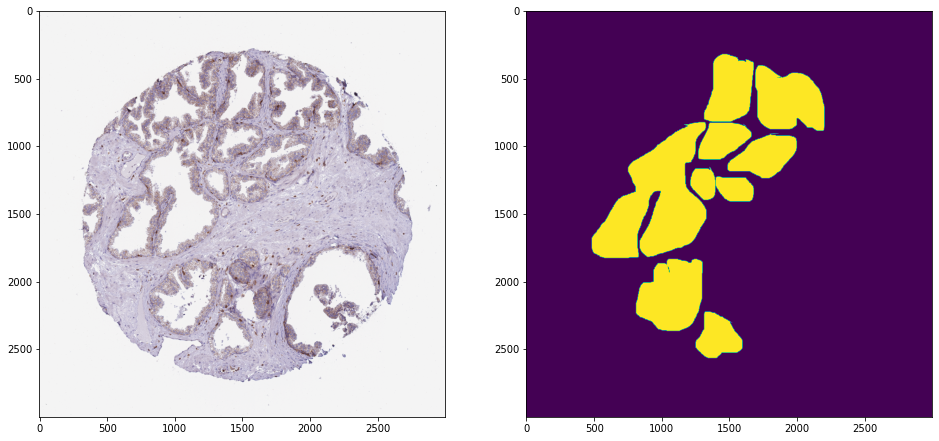

In [7]:
i = 0
rle_img = rle2mask(train_df["rle"].iloc[i],(train_df["img_height"].iloc[i],train_df["img_width"].iloc[i]))
img_dir = os.path.join(DIR, "train_images" , str(train_df["id"].iloc[i]) + '.tiff')
img = plt.imread(img_dir)

plt.figure(figsize=(16,18))
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(rle_img)

In [10]:
with open(os.path.join(DIR, "train_annotations/10044.json")) as rle_json:
    data = json.load(rle_json)
    
print(data.__len__())

9


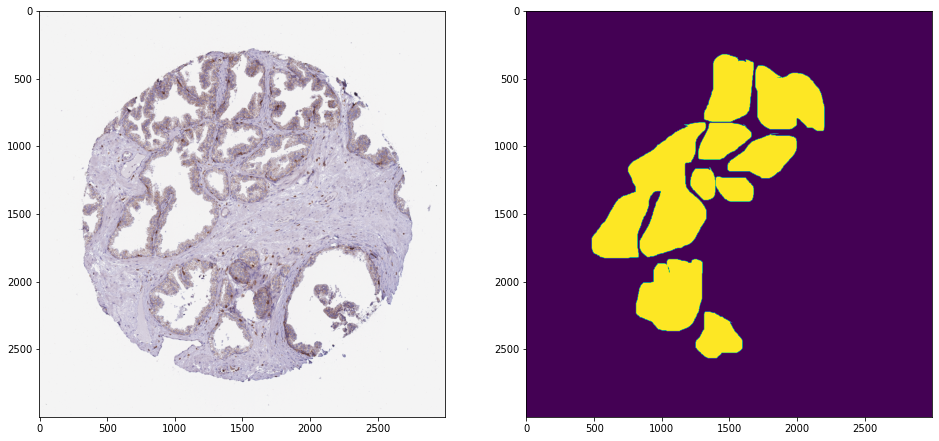

In [11]:
image = np.zeros((3000,3000))
for i in range(len(data)):
    image = cv2.fillPoly(image, pts = [np.array(data[i])], color =(255,255,255))

plt.figure(figsize=(16,18))
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(image);

## Overlay of Masks for Different Classes

In [12]:
folder1 = "./working/train_masks"
folder2 = "./working/train_masks_np"

if not os.path.isdir(folder1):
    os.mkdir(folder1)
    
if not os.path.isdir(folder2):
    os.mkdir(folder2)
    
    
for i in tqdm(range(len(train_df))):
    rle_img = rle2mask(train_df["rle"].iloc[i],(train_df["img_height"].iloc[i],train_df["img_width"].iloc[i]))
    f_name1 = os.path.join(folder1, str(train_df["id"].iloc[i])+'.png')
    f_name2 = os.path.join(folder2, str(train_df["id"].iloc[i])+'.npy')

    cv2.imwrite(f_name1,rle_img)
    np.save(f_name2, rle_img)

100%|████████████████| 351/351 [00:38<00:00,  9.22it/s]


In [13]:
TRAIN_DIR = DIR + "/train_images/"
func = lambda x: TRAIN_DIR + str(x) + ".tiff"
train_df["img_path"] = train_df["id"].apply(func)
train_df.head()

id     organ data_source  img_height  img_width  pixel_size  \
0  10044  prostate         HPA        3000       3000         0.4   
1  10274  prostate         HPA        3000       3000         0.4   
2  10392    spleen         HPA        3000       3000         0.4   
3  10488      lung         HPA        3000       3000         0.4   
4  10610    spleen         HPA        3000       3000         0.4   

   tissue_thickness                                                rle   age  \
0                 4  1459676 77 1462675 82 1465674 87 1468673 92 14...  37.0   
1                 4  715707 2 718705 8 721703 11 724701 18 727692 3...  76.0   
2                 4  1228631 20 1231629 24 1234624 40 1237623 47 12...  82.0   
3                 4  3446519 15 3449517 17 3452514 20 3455510 24 34...  78.0   
4                 4  478925 68 481909 87 484893 105 487863 154 4908...  21.0   

      sex                         img_path  
0    Male  ./input/train_images/10044.tiff  
1    Male  ./input/train_images/10274.tiff  
2    Male  ./input/train_images/10392.tiff  
3    Male  ./input/train_images/10488.tiff  
4  Female  ./input/train_images/10610.tiff

In [14]:
kidney_files = random.choices(train_df[train_df["organ"]=='kidney']['img_path'].to_list(),k=1)
prostate_files = random.choices(train_df[train_df["organ"]=='prostate']['img_path'].to_list(),k=1)
largeint_files = random.choices(train_df[train_df["organ"]=='largeintestine']['img_path'].to_list(),k=1)
splieen_files = random.choices(train_df[train_df["organ"]=='spleen']['img_path'].to_list(),k=1)
lung_files = random.choices(train_df[train_df["organ"]=='lung']['img_path'].to_list(),k=1)

organ_list = np.unique(train_df["organ"]).tolist()
main_list = [kidney_files,prostate_files, largeint_files, splieen_files, lung_files,]

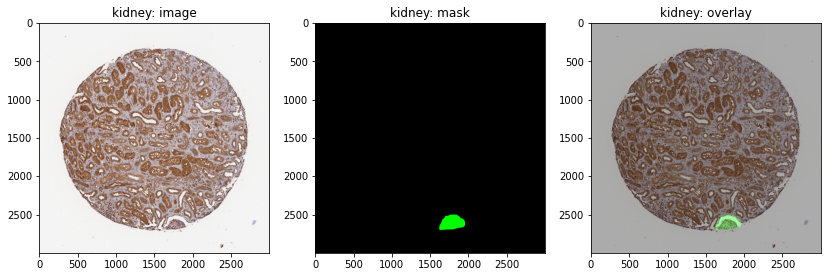

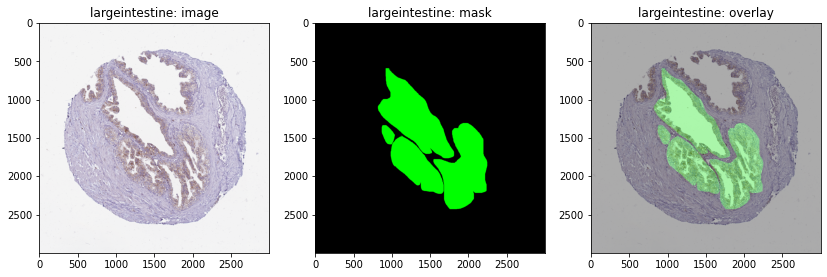

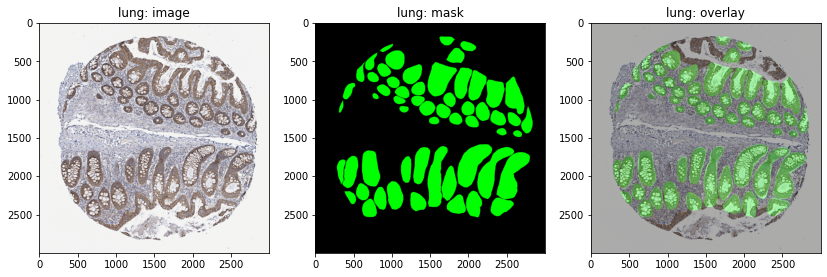

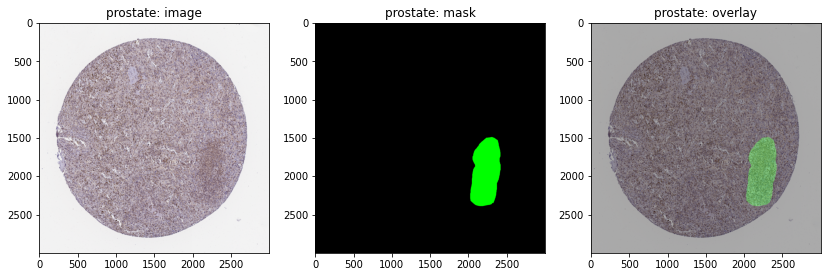

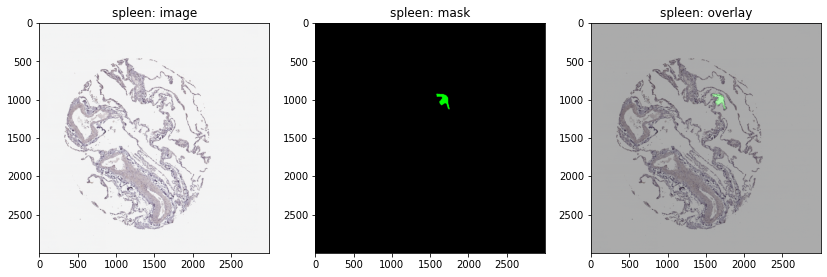

In [20]:
MASK_DIR = "./working/train_masks_np/"

for i in range(5):
    img = cv2.resize(imread(main_list[i][0]),(3000,3000))
    mask_file = MASK_DIR + main_list[i][0].split('/')[-1].split('.')[0]+'.npy'
    mask = np.resize(np.load(mask_file),(3000,3000))
    mask = mask.reshape(mask.shape[0],mask.shape[1],1)
    zero_mask = np.zeros((3000,3000,3))

    zero_mask[:,:,0] = mask[:,:,0]
    zero_mask[:,:,1] = mask[:,:,0]
    zero_mask[:,:,2] = mask[:,:,0]
    
    zero_mask[:,:,0] = zero_mask[:,:,0] * 0
    zero_mask[:,:,1] = zero_mask[:,:,1] * 255 
    zero_mask[:,:,2] = zero_mask[:,:,2] * 0 

    zero_mask = zero_mask.astype(np.uint8)
    
    combo = cv2.addWeighted(img, 0.7, zero_mask, 0.3, 0.0)
    
    plt.figure(figsize=(14,16))
    
    ax1 = plt.subplot(1,3,1)
    plt.imshow(img)
    ax1.set_title(f"{organ_list[i]}: image")
    
    
    ax2 = plt.subplot(1,3,2)
    plt.imshow(zero_mask)
    ax2.set_title(f"{organ_list[i]}: mask")
    
    ax3 = plt.subplot(1,3,3)
    plt.imshow(combo)
    ax3.set_title(f"{organ_list[i]}: overlay")
    
    plt.show()

## Training

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import warnings
import cv2
import matplotlib.pyplot as plt
import json
import gc
import time
from tqdm import tqdm
import random
from collections import defaultdict
from IPython.display import display

#Pytorch Imports
import torch
import torchvision # torch package for vision related things
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import Dataset, DataLoader  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
from torchvision.transforms import Resize
from torch.optim import lr_scheduler
from tifffile import imread

from albumentations.pytorch.transforms import ToTensorV2
import albumentations as A
from sklearn.model_selection import train_test_split

# For descriptive error messages
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

warnings.filterwarnings("ignore")

In [2]:
CONFIG = {
    "in_channels" :3,
    "num_classes": 1,
    "BATCH_SIZE" : 8,
    "NUM_EPOCHS" : 40,
    "n_accumulate": 1,
    "competition": "hubman-organ-segmentation",
    "model_name": "Vanilla-UNet",
    "LEARNING_RATE": 1e-4,
    "DEVICE": "cuda" if torch.cuda.is_available() else "cpu", 
    "AUG": "No",
    "SEED": 42,
    "opt": 'Adam',
    "Normalization": "L2",
    "img_size": 256
}

In [3]:
def set_seed(seed = 42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    print('Seeding Done.')
    
set_seed(CONFIG["SEED"])

Seeding Done.


In [4]:
import wandb

wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ethan-ai. Use `wandb login --relogin` to force relogin


True

In [5]:
run = wandb.init(project=CONFIG['competition'], 
                 config=CONFIG,
                 job_type='Train',
                 tags=['semantic segmentation', CONFIG['model_name']],
                 anonymous='must',
                 name="Vanilla_Unet_1",
                 notes="")

In [6]:
DIR = "./input/"
train_df = pd.read_csv(os.path.join(DIR,"train.csv"))
train_df.head()

id     organ data_source  img_height  img_width  pixel_size  \
0  10044  prostate         HPA        3000       3000         0.4   
1  10274  prostate         HPA        3000       3000         0.4   
2  10392    spleen         HPA        3000       3000         0.4   
3  10488      lung         HPA        3000       3000         0.4   
4  10610    spleen         HPA        3000       3000         0.4   

   tissue_thickness                                                rle   age  \
0                 4  1459676 77 1462675 82 1465674 87 1468673 92 14...  37.0   
1                 4  715707 2 718705 8 721703 11 724701 18 727692 3...  76.0   
2                 4  1228631 20 1231629 24 1234624 40 1237623 47 12...  82.0   
3                 4  3446519 15 3449517 17 3452514 20 3455510 24 34...  78.0   
4                 4  478925 68 481909 87 484893 105 487863 154 4908...  21.0   

      sex  
0    Male  
1    Male  
2    Male  
3    Male  
4  Female

In [7]:
TRAIN_DIR = DIR + "train_images/"
func = lambda x: TRAIN_DIR + str(x) + ".tiff"
train_df["img_path"] = train_df["id"].apply(func)
train_df.head()

id     organ data_source  img_height  img_width  pixel_size  \
0  10044  prostate         HPA        3000       3000         0.4   
1  10274  prostate         HPA        3000       3000         0.4   
2  10392    spleen         HPA        3000       3000         0.4   
3  10488      lung         HPA        3000       3000         0.4   
4  10610    spleen         HPA        3000       3000         0.4   

   tissue_thickness                                                rle   age  \
0                 4  1459676 77 1462675 82 1465674 87 1468673 92 14...  37.0   
1                 4  715707 2 718705 8 721703 11 724701 18 727692 3...  76.0   
2                 4  1228631 20 1231629 24 1234624 40 1237623 47 12...  82.0   
3                 4  3446519 15 3449517 17 3452514 20 3455510 24 34...  78.0   
4                 4  478925 68 481909 87 484893 105 487863 154 4908...  21.0   

      sex                         img_path  
0    Male  ./input/train_images/10044.tiff  
1    Male  ./input/train_images/10274.tiff  
2    Male  ./input/train_images/10392.tiff  
3    Male  ./input/train_images/10488.tiff  
4  Female  ./input/train_images/10610.tiff

In [8]:
MASK_DIR = "./input/train_masks_np/"
func1 = lambda x: MASK_DIR + str(x) + ".npy"
train_df["mask_path"] = train_df["id"].apply(func1)
print(train_df["mask_path"].iloc[9])
train_df.head()

./input/train_masks_np/10892.npy


id     organ data_source  img_height  img_width  pixel_size  \
0  10044  prostate         HPA        3000       3000         0.4   
1  10274  prostate         HPA        3000       3000         0.4   
2  10392    spleen         HPA        3000       3000         0.4   
3  10488      lung         HPA        3000       3000         0.4   
4  10610    spleen         HPA        3000       3000         0.4   

   tissue_thickness                                                rle   age  \
0                 4  1459676 77 1462675 82 1465674 87 1468673 92 14...  37.0   
1                 4  715707 2 718705 8 721703 11 724701 18 727692 3...  76.0   
2                 4  1228631 20 1231629 24 1234624 40 1237623 47 12...  82.0   
3                 4  3446519 15 3449517 17 3452514 20 3455510 24 34...  78.0   
4                 4  478925 68 481909 87 484893 105 487863 154 4908...  21.0   

      sex                         img_path                         mask_path  
0    Male  ./input/train_images/10044.tiff  ./input/train_masks_np/10044.npy  
1    Male  ./input/train_images/10274.tiff  ./input/train_masks_np/10274.npy  
2    Male  ./input/train_images/10392.tiff  ./input/train_masks_np/10392.npy  
3    Male  ./input/train_images/10488.tiff  ./input/train_masks_np/10488.npy  
4  Female  ./input/train_images/10610.tiff  ./input/train_masks_np/10610.npy

In [9]:
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)

train_df.__len__(), len(test_df)

(280, 71)

In [10]:
%timeit img_temp = imread(train_df["img_path"].iloc[0])

6.54 ms ± 117 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## PyTorch Data Class

In [11]:
# TODO: Figure out how these numbers are obtained

mean = np.array([0.7720342, 0.74582646, 0.76392896])
std = np.array([0.24745085, 0.26182273, 0.25782376])

In [12]:
def img2tensor(img,dtype:np.dtype=np.float32):
    if img.ndim == 2: img = np.expand_dims(img, 2)
    img = np.transpose(img, (2, 0, 1))
    return torch.from_numpy(img.astype(dtype, copy=False))

In [13]:
class HuBMAPData(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.img_paths = df["img_path"].to_numpy()
        self.mask_paths = df["mask_path"].to_numpy()
        self.transform = transform
        
        
    def __getitem__(self, index):
        # load data from the pre-processed npy files
        img_file = self.img_paths[index]
        mask_file = self.mask_paths[index]
        img = imread(img_file)
        mask = np.load(mask_file)

        if self.transform is not None:
            transformed = self.transform(image=img, mask=mask)
            img = transformed["image"]
            mask = transformed["mask"]

            if mask.shape[-1] == 1:
                mask = mask.permute(2, 0, 1)
                
        return img2tensor((img / 255.0 - mean) / std), img2tensor(mask)

    def __len__(self):
        return len(self.df)

In [14]:
train_transform = A.Compose(
    [
        A.Resize(256, 256, p=1),
    ]
)

test_transform = A.Compose(
    [
        A.Resize(256, 256, p=1.0),
    ]
)

In [15]:
train_data = HuBMAPData(train_df, train_transform)
test_data = HuBMAPData(test_df, test_transform)

print(train_data[10][0].shape, train_data[10][1].shape)

torch.Size([3, 256, 256]) torch.Size([1, 256, 256])


In [16]:
temp_img = train_data[10][0]
temp_mask = train_data[10][1]
# plt.imshow(temp_img.permute(1,2,0).detach().numpy())
img_trfm = ((temp_img.permute(1,2,0) * std + mean) * 255.0).numpy().astype(np.uint8)

## UNet

In [17]:
class double_conv(nn.Module):
    """(conv => BN => ReLU) * 2"""

    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        x = self.conv(x)
        return x

class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(nn.MaxPool2d(2), double_conv(in_ch, out_ch))

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch // 2, in_ch // 2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        x1 = self.up(x1)

        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2))
        
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x


class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.inc = inconv(n_channels, 64)
        self.down1 = down(64, 128)
        self.down2 = down(128, 256)
        self.down3 = down(256, 512)
        self.down4 = down(512, 512)
        self.up1 = up(1024, 256, False)
        self.up2 = up(512, 128, False)
        self.up3 = up(256, 64, False)
        self.up4 = up(128, 64, False)
        self.outc = outconv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        x = self.outc(x)
        
        return torch.sigmoid(x)

In [18]:
train_on_gpu = torch.cuda.is_available()
model = UNet(n_channels=CONFIG["in_channels"], n_classes=CONFIG["num_classes"])
if train_on_gpu:
    model.cuda()

# model(temp_img.unsqueeze(0).cuda()).shape
model(temp_img.unsqueeze(0)).shape

torch.Size([1, 1, 256, 256])

In [19]:
train_loader = torch.utils.data.DataLoader(
               dataset=train_data,
               batch_size=CONFIG["BATCH_SIZE"],
               shuffle=False)

test_loader = torch.utils.data.DataLoader(
              dataset=test_data,
              batch_size=CONFIG["BATCH_SIZE"],
              shuffle=False)

In [20]:
class DiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        
        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = F.sigmoid(inputs)       
        
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)  
        
        return 1 - dice

loss_fn = DiceLoss() #Dice()
optimizer = optim.Adam(model.parameters(), lr=CONFIG["LEARNING_RATE"],weight_decay=1e-5)

In [21]:
def dice_coef(y_true, y_pred, thr=0.5, dim=(2,3), epsilon=0.001):
    y_true = y_true.to(torch.float32)
    y_pred = (y_pred>thr).to(torch.float32)
    inter = (y_true*y_pred).sum(dim=dim)
    den = y_true.sum(dim=dim) + y_pred.sum(dim=dim)
    dice = ((2*inter+epsilon)/(den+epsilon)).mean(dim=(1,0))
    return dice

def iou_coef(y_true, y_pred, thr=0.5, dim=(2,3), epsilon=0.001):
    y_true = y_true.to(torch.float32)
    y_pred = (y_pred>thr).to(torch.float32)
    inter = (y_true*y_pred).sum(dim=dim)
    union = (y_true + y_pred - y_true*y_pred).sum(dim=dim)
    iou = ((inter+epsilon)/(union+epsilon)).mean(dim=(1,0))
    return iou

In [22]:
model_path = "./model_weights"
if not os.path.exists(model_path):
    os.makedirs(model_path)
    
def save_model(model, optimizer, criterion, epoch):
    """
    Function to save the trained model to disk.
    """
    print(f"\n Saving model at {epoch}th epoch")
    fname = f'{model_path}/{CONFIG["model_name"]}-{CONFIG["LEARNING_RATE"]}-{CONFIG["AUG"]}-{epoch}-{CONFIG["BATCH_SIZE"]}.pth'
    torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': criterion,
                }, fname )
    return fname

In [23]:
def train_fn(loader, model, optimizer, loss_fn,epoch):
    bar = tqdm(enumerate(loader), total=len(loader))

    running_loss = 0.0
    dataset_size = 0

    for batch_idx, (data, targets) in bar:
        data = data.to(device=CONFIG["DEVICE"])
        targets = targets.float().to(device=CONFIG["DEVICE"])

        # forward
        predictions = model(data)
        loss = loss_fn(predictions, targets)

        
        optimizer.zero_grad()
        # backward
        loss.backward()
        # Update Weights
        optimizer.step()
        
        # Calculate Loss
        running_loss += loss.item()
        
        epoch_loss = running_loss / len(loader)

        # update tqdm loop
        bar.set_postfix(Epoch=epoch,loss=epoch_loss)
    
        
    gc.collect()
    
    return epoch_loss

In [24]:
@torch.no_grad()
def valid_one_epoch(model, dataloader, device, epoch):
    model.eval()
    
    dataset_size = 0
    running_loss = 0.0
    
    val_scores = []
    
    pbar = tqdm(enumerate(dataloader), total=len(dataloader))
    for step, (images, masks) in pbar:
        images  = images.to(CONFIG["DEVICE"], dtype=torch.float)
        masks   = masks.to(CONFIG["DEVICE"], dtype=torch.float)
        
        
        y_pred  = model(images)
        loss    = loss_fn(y_pred, masks)
        
        running_loss += (loss.item() * CONFIG["BATCH_SIZE"])
        dataset_size += CONFIG["BATCH_SIZE"]
        
        epoch_loss = running_loss / dataset_size
        
        y_pred = nn.Sigmoid()(y_pred)
        val_dice = dice_coef(masks, y_pred).cpu().detach().numpy()
        val_jaccard = iou_coef(masks, y_pred).cpu().detach().numpy()
        val_scores.append([val_dice, val_jaccard])
        
        mem = torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0
        current_lr = optimizer.param_groups[0]['lr']
        pbar.set_postfix(valid_loss=f'{epoch_loss:0.4f}',
                        lr=f'{current_lr:0.5f}',
                        gpu_memory=f'{mem:0.2f} GB')
    val_scores  = np.mean(val_scores, axis=0)
    torch.cuda.empty_cache()
    gc.collect()
    
    return epoch_loss, val_scores

In [ ]:
history = defaultdict(list)
best_val_dice = -float('inf')
best_val_jaccard = -float('inf')
start = time.time()


for epoch in range(CONFIG["NUM_EPOCHS"]):
    
    print(f'===================== Epoch: [{epoch+1}/{CONFIG["NUM_EPOCHS"]}] =====================')

    # train and validation loop
    train_loss = train_fn(train_loader, model, optimizer, loss_fn, epoch+1)
    val_loss, val_scores = valid_one_epoch(model, test_loader,CONFIG["DEVICE"], epoch+1)
    val_dice, val_jaccard = val_scores

    # save model
    model_file = save_model(model, optimizer, loss_fn, epoch+1)
    
    # weight and baise Log the metrics
    wandb.log({"Train Loss": train_loss})
    wandb.log({"Valid Loss": val_loss})
    wandb.log({"Valid dice": val_dice})
    wandb.log({"Valid jaccard": val_jaccard})

    # logging
    history["epoch"].append(epoch+1)
    history['Train_Loss'].append(train_loss)
    history['Valid_Loss'].append(val_loss)
    history['Valid_jaccard'].append(val_jaccard)
    history['Valid_dice'].append(val_dice)
    history["model_file"].append(model_file)

    
    # print loss and scores
    print(f"\n Final Train Loss: {train_loss:0.4f}  |  Final Val Loss: {val_loss:0.4f}") 
    
    print(f'Valid Dice: {val_dice:0.4f} | Valid Jaccard: {val_jaccard:0.4f}')
    
    
    # print best val score
    if best_val_dice < val_dice:
        print(f"val dice increased: {best_val_dice} ---> {val_dice}")
        best_val_dice = val_dice
    
    if best_val_jaccard < val_jaccard:
        print(f"val jaccard increased: {best_val_jaccard} ---> {val_jaccard}")
        best_val_jaccard = val_jaccard

        
        
# print time
end = time.time()
time_elapsed = end - start
avg_time_per_epoch = time_elapsed/CONFIG["NUM_EPOCHS"] 
summary_df = pd.DataFrame.from_dict(history)

print(f'\n ====================== [Training Summary] ====================== \n')
print('Training complete in {:.0f}h {:.0f}m {:.0f}s'.format(
    time_elapsed // 3600, (time_elapsed % 3600) // 60, (time_elapsed % 3600) % 60))

print('avg time per [train + val] epoch {:.0f}h {:.0f}m {:.0f}s'.format(
    avg_time_per_epoch // 3600, (avg_time_per_epoch % 3600) // 60, (avg_time_per_epoch % 3600) % 60))

print("Best: ~~~~~~ dice: {:.4f}  || jaccard {:.4f} || val_loss {:.4f} || train_loss {:.4f} ~~~~~~".format(
    best_val_dice, best_val_jaccard, min(history['Valid_Loss']), min(history['Train_Loss'])))


summary_df.to_csv('training_summary.csv')
print("Saved training summary...")

print(f'\n =============================================================== \n')

display(summary_df)

# plotting training and validation loss
plt.figure(figsize=(15,8))

fig1 = plt.subplot(2,2,1)
fig1.plot(history['epoch'], history['Train_Loss'], color='lime', marker='>')
fig1.set_title("train loss [dice]")
fig1.set(xlabel='epoch', ylabel='train loss')

fig2 = plt.subplot(2,2,2)
fig2.plot(history['epoch'], history['Valid_Loss'], color='cyan',  marker='>')
fig2.set_title("val loss [dice]")
fig2.set(xlabel='epoch', ylabel='val loss')

fig3 = plt.subplot(2,2,3)
fig3.plot(history['epoch'], history['Valid_dice'], color='orange',  marker='>')
fig3.set_title("Val Dice")
fig3.set(xlabel='epoch', ylabel='val dice')

fig4 = plt.subplot(2,2,4)
fig4.plot(history['epoch'], history['Valid_jaccard'], color='lightcoral',  marker='>')
fig4.set_title("val jaccard")
fig4.set(xlabel='epoch', ylabel='val jaccard')

plt.show()

===================== Epoch: [1/40] =====================


100%|█| 35/35 [17:17<00:00, 29.63s/it, Epoch=1, loss=0.
100%|█| 9/9 [01:21<00:00,  9.04s/it, gpu_memory=0.00 GB



 Saving model at 1th epoch

 Final Train Loss: 0.8129  |  Final Val Loss: 0.8189
Valid Dice: 0.1598 | Valid Jaccard: 0.0948
val dice increased: -inf ---> 0.1598295122385025
val jaccard increased: -inf ---> 0.09481830894947052
===================== Epoch: [2/40] =====================


 29%|▎| 10/35 [05:22<13:02, 31.31s/it, Epoch=2, loss=0.

# Dependencies [[3]](https://pypi.org/project/opencv-python/)[[4]](https://pypi.org/project/tifffile/)[[7]](https://docs.python.org/3/library/glob.html)[[10]](https://albumentations.ai)

In [1]:
import cv2
import gc
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
import tifffile as tiff
import warnings
import wandb
from time import sleep
from tqdm.notebook import tqdm
from typing import Tuple

import albumentations as A
import torch
import torchvision
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Resize
from torch.optim import lr_scheduler
from sklearn.model_selection import train_test_split

plt.style.use("Solarize_Light2")

In [2]:
os.environ["WANDB_NOTEBOOK_NAME"] = "./poc.ipynb"

In [3]:
wandb.login()

wandb: Currently logged in as: ethan-ai. Use `wandb login --relogin` to force relogin


True

In [4]:
class config:
    BASE_PATH = "./input/"
    TRAIN_PATH = os.path.join(BASE_PATH, "train")

WANDB_CONFIG = {
    "_wandb_kernel": "ethan.ai",
}

run = wandb.init(
    project="hubmap-organ-segmentation",
    config=WANDB_CONFIG,
)

# Train Dataset

In [5]:
df = pd.read_csv(os.path.join(config.BASE_PATH, "train.csv"))
df.head()

id     organ data_source  img_height  img_width  pixel_size  \
0  10044  prostate         HPA        3000       3000         0.4   
1  10274  prostate         HPA        3000       3000         0.4   
2  10392    spleen         HPA        3000       3000         0.4   
3  10488      lung         HPA        3000       3000         0.4   
4  10610    spleen         HPA        3000       3000         0.4   

   tissue_thickness                                                rle   age  \
0                 4  1459676 77 1462675 82 1465674 87 1468673 92 14...  37.0   
1                 4  715707 2 718705 8 721703 11 724701 18 727692 3...  76.0   
2                 4  1228631 20 1231629 24 1234624 40 1237623 47 12...  82.0   
3                 4  3446519 15 3449517 17 3452514 20 3455510 24 34...  78.0   
4                 4  478925 68 481909 87 484893 105 487863 154 4908...  21.0   

      sex  
0    Male  
1    Male  
2    Male  
3    Male  
4  Female

`%%capture` is a built-in magic command in IPython. It captures the output of the cell and discards it if no variable name is specified. [[2]](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-capture)

In [6]:
%%capture
wandb.log({"df_train": df})

# Actual Image

In [7]:
sample_row = df.iloc[0]
sample_img_id = sample_row["id"]
sample_img_path = os.path.join(config.BASE_PATH, "train_images", f"{sample_img_id}.tiff")
sample_img = tiff.imread(sample_img_path)
print(sample_img.shape)

(3000, 3000, 3)


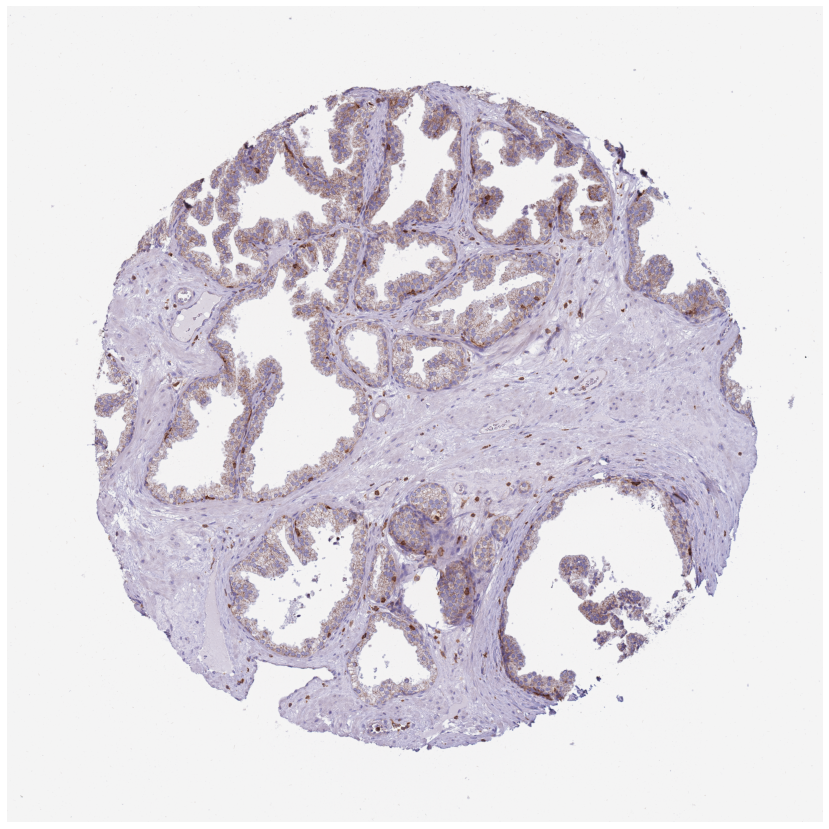

In [8]:
plt.figure(figsize=(15, 15))
plt.imshow(sample_img)
plt.axis("off")
wandb.log({f"Sample Image (id: {sample_img_id})": plt})

# Mask [[5]](https://www.kaggle.com/code/paulorzp/rle-functions-run-lenght-encode-decode/script)[[6]](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [9]:
def mask2rle(mask: np.ndarray) -> str:
    """
    Converts a mask into its run-length encoding.

    Args:
        mask (np.ndarray): 1 - mask, 0 - background.

    Returns:
        str: Run-length encoding of the mask.
    """
    pixels = mask.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return " ".join(str(x) for x in runs)

In [10]:
def rle2mask(rle: str, shape: Tuple[int, int] = (1600, 256)) -> np.ndarray:
    """
    Converts a run length encoding into the corresponding mask.

    Args:
        rle (str): Run-length encoding.
        shape (Tuple[int, int], optional): (width, height) of the array to return. Defaults to (1600, 256).

    Returns:
        np.ndarray: 1 - mask, 0 - background.
    """
    s = rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    mask = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        mask[lo:hi] = 1
    return mask.reshape(shape).T

In [11]:
rle2mask("1 4 29 9", (9, 5))

array([[1, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0]], dtype=uint8)

In [12]:
sample_mask = rle2mask(sample_row["rle"], (sample_img.shape[1], sample_img.shape[0]))
sample_mask.shape

(3000, 3000)

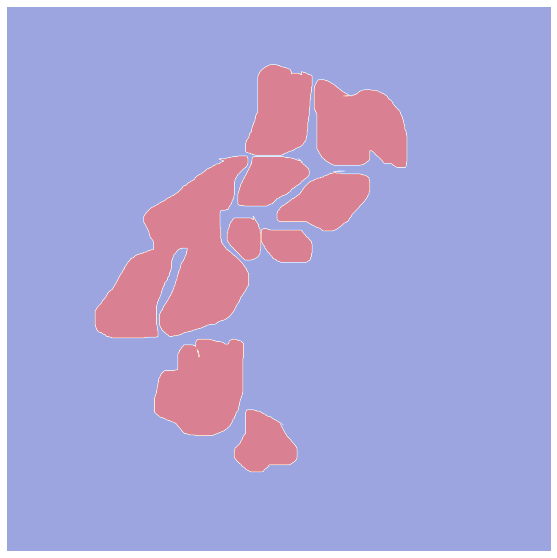

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(sample_mask, cmap="coolwarm", alpha=0.5)
plt.axis("off")
wandb.log({f"Sample Mask (id: {sample_img_id})": plt})

# Combining Image with Mask [[8]](https://docs.wandb.ai/ref/python/data-types/table)[[9]](https://github.com/wandb/wandb/issues/3045)

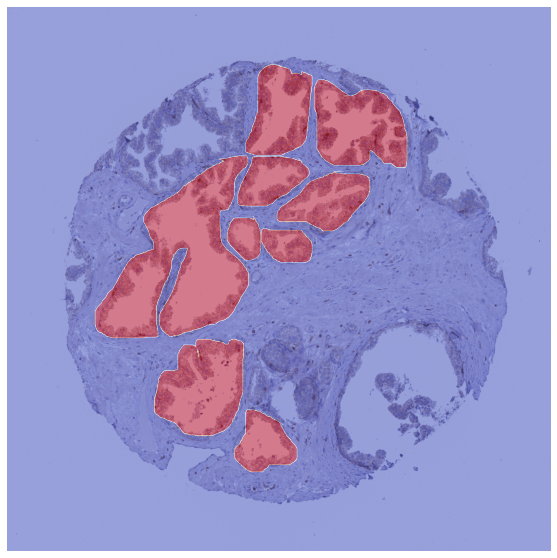

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(sample_img)
plt.imshow(sample_mask, cmap="coolwarm", alpha=0.5)
plt.axis("off")
wandb.log({f"Sample Image with Mask (id: {sample_img_id})": plt})

In [15]:
TABLE_COLUMNS = [
    "ID",
    "Image",
    "Mask",
    "Image with Mask",
]

image_ids = df["id"]

def save_table(table_name: str) -> None:
    table = wandb.Table(columns=TABLE_COLUMNS, allow_mixed_types=True)
    total_images = len(image_ids)

    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        img_id = row["id"]
        img_path = os.path.join(config.BASE_PATH, f"train_images/{img_id}.tiff")
        img = tiff.imread(img_path)
        mask = rle2mask(row["rle"], (img.shape[1], img.shape[0]))
        
        plt.figure(figsize=(10, 10))
        plt.axis("off")
        plt.imshow(img)
        plt.imshow(mask, cmap="coolwarm", alpha=0.5)
        plt.savefig("./image.jpg")
        plt.close()

        table.add_data(
            img_id, 
            wandb.Image(img),
            wandb.Image(mask),
            wandb.Image(cv2.cvtColor(cv2.imread("./image.jpg"), cv2.COLOR_BGR2RGB))
        )

    wandb.log({table_name: table})

In [16]:
save_table("Images with Masks")

  0%|          | 0/351 [00:00<?, ?it/s]

wandb: Network error (TransientError), entering retry loop.
wandb: Network error (TransientError), entering retry loop.
wandb: Network error (TransientError), entering retry loop.
wandb: Network error (TransientError), entering retry loop.
wandb: Network error (TransientError), entering retry loop.
wandb: Network error (TransientError), entering retry loop.
wandb: Network error (TransientError), entering retry loop.


# References

1. [Kaggle Code - HuBMAP: Complete Understanding and EDA | W&B](https://www.kaggle.com/code/ishandutta/hubmap-complete-understanding-and-eda-w-b)
2. [IPython Documentation - %%capture](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-capture)
3. [PyPI Package - opencv-python](https://pypi.org/project/opencv-python/)
4. [PyPI Package - tifffile](https://pypi.org/project/tifffile/)
5. [Kaggle Code - RLE Functions](https://www.kaggle.com/code/paulorzp/rle-functions-run-lenght-encode-decode/script)
6. [Matplotlib Documentation - Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
7. [glob Documentation](https://docs.python.org/3/library/glob.html)
8. [wandb Documentation | wandb.Table](https://docs.wandb.ai/ref/python/data-types/table)
9. [wandb GitHub | Exception: The wandb backend process has shutdown?](https://github.com/wandb/wandb/issues/3045)
10. [Albumentations Documentation](https://albumentations.ai)
11. [Kaggle Code - Understanding Dice coefficient](https://www.kaggle.com/code/yerramvarun/understanding-dice-coefficient)
12. [StackOverflow - What is %timeit in Python?](https://stackoverflow.com/a/29280612/2704893)
13. [PyTorch GitHub - Issue related to Python 3.8 on Mac](https://github.com/pytorch/pytorch/issues/60319#issuecomment-864475567)